In [1]:
import os,glob
import numpy as np
import cv2
from copy import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def explore_dir(dir,count=0,f_extensions=None):
    if count==0:
        global n_dir, n_file, filenames, filelocations
        n_dir=n_file=0
        filenames=list()
        filelocations=list()

    for img_path in sorted(glob.glob(os.path.join(dir,'*' if f_extensions is None else '*.'+f_extensions))):
        if os.path.isdir(img_path):
            n_dir +=1
            explore_dir(img_path,count+1)
        elif os.path.isfile(img_path):
            n_file += 1
            filelocations.append(img_path)
            filenames.append(img_path.split("/")[-1])
    return np.array((filenames,filelocations))


In [3]:
tr_img_path = explore_dir('./fruits-360/Training/')

In [4]:
tr_img_path

array([['0_100.jpg', '100_100.jpg', '101_100.jpg', ..., 'r_97_100.jpg',
        'r_98_100.jpg', 'r_99_100.jpg'],
       ['./fruits-360/Training/Apple Braeburn/0_100.jpg',
        './fruits-360/Training/Apple Braeburn/100_100.jpg',
        './fruits-360/Training/Apple Braeburn/101_100.jpg', ...,
        './fruits-360/Training/Walnut/r_97_100.jpg',
        './fruits-360/Training/Walnut/r_98_100.jpg',
        './fruits-360/Training/Walnut/r_99_100.jpg']], dtype='<U55')

In [5]:
te_img_path = explore_dir('./fruits-360/Test/')

In [6]:
te_img_path

array([['321_100.jpg', '322_100.jpg', '323_100.jpg', ..., 'r_7_100.jpg',
        'r_8_100.jpg', 'r_9_100.jpg'],
       ['./fruits-360/Test/Apple Braeburn/321_100.jpg',
        './fruits-360/Test/Apple Braeburn/322_100.jpg',
        './fruits-360/Test/Apple Braeburn/323_100.jpg', ...,
        './fruits-360/Test/Walnut/r_7_100.jpg',
        './fruits-360/Test/Walnut/r_8_100.jpg',
        './fruits-360/Test/Walnut/r_9_100.jpg']], dtype='<U51')

In [7]:
tr_img=list(tr_img_path[1])
te_img=list(te_img_path[1])

In [8]:
tr_img_list = list()
te_img_list = list()

for i in range(len(tr_img)):
    tr_img_list.append(cv2.imread(tr_img[i]))
for i in range(len(te_img)):
    te_img_list.append(cv2.imread(te_img[i]))

In [9]:
tr_imgset = np.array(tr_img_list)
te_imgset = np.array(te_img_list)

In [10]:
tr_class = list()
tr_label = list()
te_class = list()
te_label = list()

for i in range(len(tr_img)): 
    tr_class.append(tr_img_path[1,i].split('/')[-2])
    tr_label.append((list(tr_class)).index(tr_img_path[1,i].split('/')[-2]))
for i in range(len(te_img)):
    te_class.append(te_img_path[1,i].split('/')[-2])
    te_label.append((list(te_class)).index(te_img_path[1,i].split('/')[-2]))

In [11]:
# data shuffling
tr_img = copy(tr_imgset)
label = np.array(copy(tr_label))

idx = np.random.permutation(len(tr_img))
tr_img = tr_img[idx]
label = label[idx]

Peach Flat


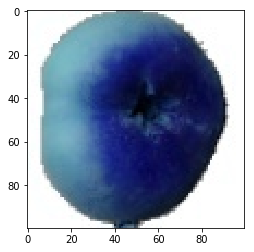

In [12]:
# for test 
idx=900
print(tr_class[label[idx]])
plt.imshow(tr_img[idx])